In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

## Let's have a look

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


/Users/luoqiaoen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


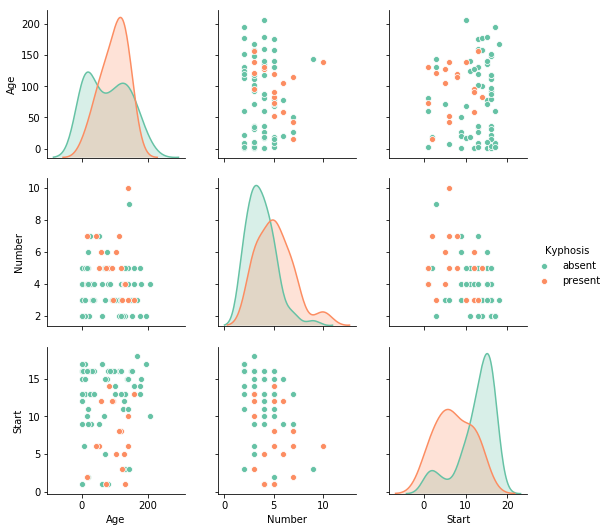

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set2')

# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtree = DecisionTreeClassifier()

In [8]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Evaluate Model

In [9]:
predictions = dtree.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.76      0.89      0.82        18
     present       0.50      0.29      0.36         7

   micro avg       0.72      0.72      0.72        25
   macro avg       0.63      0.59      0.59        25
weighted avg       0.69      0.72      0.69        25



In [12]:
print(confusion_matrix(y_test,predictions))

[[16  2]
 [ 5  2]]
